![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
38562,id_510,Prague,"['Bar', 'European', 'Czech', 'Eastern European...",511.0,$$ - $$$,380.0,[['Small little place in middle of old town n....,/Restaurant_Review-g274707-d2430678-Reviews-Do...,d2430678,1,4.0
29863,id_1202,London,"['American', 'Bar', 'Fast Food', 'Pub', 'Veget...",1204.0,$$ - $$$,88.0,"[['Brilliant Burger Restaurant', 'Good food gr...",/Restaurant_Review-g186338-d10816816-Reviews-H...,d10816816,1,4.5
32945,id_663,Madrid,"['Indian', 'Vegetarian Friendly', 'Vegan Optio...",664.0,$$ - $$$,91.0,"[['Dinner', 'Indian restaurant, good food, att...",/Restaurant_Review-g187514-d12785964-Reviews-B...,d12785964,1,4.5
12664,id_1885,Warsaw,['Indian'],1887.0,NaN,4.0,"[['Excellent Indian food'], ['07/06/2013']]",/Restaurant_Review-g274856-d4427648-Reviews-Ti...,d4427648,1,3.5
36263,id_1451,Amsterdam,NaN,1454.0,NaN,8.0,"[['Best place in Amsterdam!', 'Real Goulash <3...",/Restaurant_Review-g188590-d11898112-Reviews-G...,d11898112,1,5.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

Сделаем то же самое для всех колонок

In [18]:
data['Cuisine Style isNaN'] = pd.isna(data['Cuisine Style']).astype('uint8')
data['Price Range isNaN'] = pd.isna(data['Price Range']).astype('uint8')

In [19]:
data['Price Range isNaN'] = pd.isna(data['Price Range']).astype('uint8')


In [20]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Cuisine Style isNaN,Price Range isNaN
22450,id_2975,Rome,['Pizza'],2976.0,NaN,255.0,"[[], []]",/Restaurant_Review-g187791-d6943201-Reviews-Ri...,d6943201,1,4.0,0,0,1
7395,id_7395,Prague,"['European', 'Czech', 'Central European']",1622.0,$$ - $$$,23.0,"[['Accommodating', 'A total Fail'], ['06/25/20...",/Restaurant_Review-g274707-d3182825-Reviews-Bo...,d3182825,0,0.0,0,0,0
3739,id_3739,Copenhagen,"['Cafe', 'Healthy', 'Scandinavian', 'Danish', ...",379.0,$$ - $$$,56.0,"[['Great breakfast with my loved one.', 'Great...",/Restaurant_Review-g189541-d8515255-Reviews-Wu...,d8515255,0,0.0,0,0,0
12487,id_1298,Geneva,"['European', 'Steakhouse', 'Swiss', 'Barbecue']",1304.0,$$ - $$$,58.0,"[['Worst ever', 'Meat is grilled on a huge ind...",/Restaurant_Review-g188057-d2302076-Reviews-La...,d2302076,1,3.0,0,0,0
17415,id_1347,Prague,NaN,1348.0,NaN,11.0,[['(not necessarily only) business lunch in N....,/Restaurant_Review-g274707-d4768364-Reviews-Ga...,d4768364,1,4.5,0,1,1


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [21]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
Cuisine Style isNaN            2
Price Range isNaN              2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [22]:
addata = data['City'].value_counts().rename_axis('City').to_frame(name='Rest')
data = data.merge(addata, on='City', how='left')
data['New Rank'] = data['Ranking'] / data['Rest']
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Cuisine Style isNaN,Price Range isNaN,Rest,New Rank
34668,id_504,Oporto,"['European', 'Portuguese', 'Mediterranean']",505.0,$$ - $$$,62.0,"[['Friendly staff and good food', 'not impress...",/Restaurant_Review-g189180-d7214525-Reviews-Si...,d7214525,1,4.5,0,0,0,642,0.786604
10394,id_1989,Munich,NaN,2005.0,NaN,15.0,"[['Great quality for reasonable prices', 'Exce...",/Restaurant_Review-g187309-d1820729-Reviews-La...,d1820729,1,4.0,0,1,1,1145,1.751092
37204,id_6271,Paris,"['Lebanese', 'Mediterranean', 'Vegetarian Frie...",6272.0,$,43.0,"[['Excellent food', 'Tasty, fresh and fragrant...",/Restaurant_Review-g187147-d4972383-Reviews-De...,d4972383,1,4.0,0,0,0,6108,1.026850
46392,id_6555,Barcelona,['Mediterranean'],6556.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187497-d7056429-Reviews-Ca...,d7056429,1,3.5,0,0,1,3395,1.931075
49377,id_1796,Barcelona,"['Contemporary', 'Mediterranean', 'Spanish', '...",1797.0,$$ - $$$,152.0,"[['Great find', 'Great late night Paella to or...",/Restaurant_Review-g187497-d2012843-Reviews-Mi...,d2012843,1,4.5,0,0,0,3395,0.529308


In [23]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

#### Возьмем следующий признак "Price Range".

In [24]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [25]:
# Ваша обработка 'Price Range'
data['Price Range'].value_counts() # самое популярное -- $$ - $$$ -- заменим пропуски на него) 
data['Price Range'] = data['Price Range'].fillna('$$ - $$$')
data['Price Range'].isna().sum() # чекаем, точно ли заменилось, потому что - очевидно - писал невротик

0

In [26]:
data['Price Range'] = data['Price Range'].replace('$', '1')
data['Price Range'] = data['Price Range'].replace('$$ - $$$', '2')
data['Price Range'] = data['Price Range'].replace('$$$$', '3')

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [27]:
# Обработка признака Cuisine Style
data['Cuisine Style'].isna().sum()
k = data['Cuisine Style'].str.split("', '").str.len().fillna(1)
data['Style Amount'] = k
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Cuisine Style isNaN,Price Range isNaN,Rest,New Rank,Style Amount
35139,id_652,Lyon,NaN,653.0,2,33.0,"[['Nice place for an afterwork at 02.00 am.', ...",/Restaurant_Review-g187265-d5957282-Reviews-Ca...,d5957282,1,4.5,0,1,1,1126,0.579929,1.0
22136,id_5980,Paris,['French'],5981.0,2,14.0,"[[], []]",/Restaurant_Review-g187147-d12697799-Reviews-D...,d12697799,1,4.0,0,0,1,6108,0.979208,1.0
41192,id_10304,London,['Italian'],10313.0,1,2.0,"[[], []]",/Restaurant_Review-g186338-d12571250-Reviews-T...,d12571250,1,4.5,0,0,0,7193,1.433755,1.0
48236,id_2132,Madrid,['Spanish'],2134.0,2,81.0,"[['The best bacalao of Madrid', 'First time an...",/Restaurant_Review-g187514-d1122246-Reviews-La...,d1122246,1,4.0,0,0,0,3813,0.559664,1.0
23854,id_3792,Madrid,['Spanish'],3794.0,1,4.0,"[[], []]",/Restaurant_Review-g187514-d8572638-Reviews-Ll...,d8572638,1,4.5,0,0,0,3813,0.995017,1.0


In [28]:
pattern = re.compile('\d{2}/\d{2}/\d{4}')
reviews=[]
for i in data['Reviews']:
    reviews.append(re.findall(pattern, str(i)))
rev = pd.DataFrame(reviews).dropna()
rev.columns=['date1', 'date2']
rev['date1'] = pd.to_datetime(rev['date1']) 
rev['date2'] = pd.to_datetime(rev['date2']) 
rev['dd']= rev['date1']-rev['date2']

data['date1'] = rev['date1'].max() - rev['date1']
data['date1'] = data['date1'].apply(lambda x: x.days)
data['date1'] = data['date1'].fillna(0)
data['date1'] = data['date1'].apply(lambda x: int(x))

data['date2'] = rev['date1'].max() - rev['date2']
data['date2'] = data['date2'].apply(lambda x: x.days)
data['date2'] = data['date2'].fillna(0)
data['date2'] = data['date2'].apply(lambda x: int(x))

data['dd'] = data['date2'] - data['date1']

data.head()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Cuisine Style isNaN,Price Range isNaN,Rest,New Rank,Style Amount,date1,date2,dd
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0,6108,2.122299,2.0,0,0,0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,0,475,0.223158,5.0,83,120,37
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,0,745,1.087248,1.0,60,82,22
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,0,7193,0.232031,5.0,82,96,14
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,0,380,0.097368,6.0,18,33,15


Добавим еще признак: City_Population

In [29]:
# Добавим еще признак: City_Population
City_Population = {
    'London': 9304016, 'Paris': 2140526, 'Madrid': 3348536,'Barcelona': 1620343, 'Berlin': 3748148,
    'Milan': 1404239, 'Rome': 2856133, 'Prague': 1324277, 'Lisbon': 506654, 'Vienna': 1911728,
    'Amsterdam': 873555, 'Brussels': 1209000, 'Hamburg': 1841179, 'Munich': 1471508, 'Lyon': 515695,
    'Stockholm': 974073, 'Budapest': 1752286, 'Warsaw': 1790658, 'Dublin': 554554, 'Copenhagen': 626508,
    'Athens': 664046, 'Edinburgh': 524930, 'Zurich': 415367, 'Oporto': 237559, 'Geneva': 201818,
    'Krakow': 779115, 'Oslo': 693491, 'Helsinki': 648042, 'Bratislava': 432864, 'Luxembourg': 613894,
    'Ljubljana': 292988
}
data['City_Population'] = data['City'].map(City_Population)
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Number_of_Reviews_isNAN,Cuisine Style isNaN,Price Range isNaN,Rest,New Rank,Style Amount,date1,date2,dd,City_Population
2760,id_2760,Munich,"['American', 'Bar', 'Vegetarian Friendly', 'Ve...",384.0,2,304.0,"[['The one at the MUC airport ONLY!', 'Best bu...",/Restaurant_Review-g187309-d5552740-Reviews-Ha...,d5552740,0,...,0,0,0,1145,0.335371,4.0,98,274,176,1471508
21891,id_987,Oporto,"['European', 'Portuguese']",988.0,1,3.0,"[[], []]",/Restaurant_Review-g189180-d10256995-Reviews-O...,d10256995,1,...,0,0,0,642,1.538941,2.0,0,0,0,237559
10190,id_529,Milan,"['Italian', 'Pizza', 'Seafood', 'Mediterranean...",530.0,2,233.0,"[['Great diner, great staff', 'Fantastic meal'...",/Restaurant_Review-g187849-d3691545-Reviews-Il...,d3691545,1,...,0,0,0,2694,0.196733,7.0,64,141,77,1404239
23822,id_1085,Edinburgh,"['Indian', 'Asian', 'Balti', 'Pakistani', 'Veg...",1086.0,2,249.0,"[['Food very good, service not so much!', 'Ver...",/Restaurant_Review-g186525-d2010195-Reviews-Ke...,d2010195,1,...,0,0,0,745,1.457718,6.0,72,97,25,524930
10634,id_7756,Madrid,NaN,7763.0,2,18.0,"[['Nice Lunch Restaurant', 'Aweful service'], ...",/Restaurant_Review-g187514-d10784649-Reviews-R...,d10784649,1,...,0,1,1,3813,2.035930,1.0,356,242,-114,3348536


Добавим признак Is_capital: столица ли город, в котором находится ресторан. Для этого сделаем еще словарь

In [30]:
Country = {
    'Amsterdam': 'Netherlands', 'Athens': 'Greece', 'Barcelona': 'Spain', 'Berlin': 'Germany',
    'Bratislava': 'Slovakia', 'Brussels': 'Belgium', 'Budapest': 'Hungary', 'Copenhagen': 'Denmark',
    'Dublin': 'Ireland', 'Edinburgh': 'United Kingdom', 'Geneva': 'Switzerland', 'Hamburg': 'Germany',
    'Helsinki': 'Finland', 'Krakow': 'Poland', 'Lisbon': 'Portugal', 'Ljubljana': 'Slovenia',
    'London': 'United Kingdom', 'Luxembourg': 'Luxembourg', 'Lyon': 'France', 'Madrid': 'Spain',
    'Milan': 'Italy', 'Munich': 'Germany', 'Oporto': 'Portugal', 'Oslo': 'Norway', 'Paris': 'France',
    'Prague': 'Czechia', 'Rome': 'Italy', 'Stockholm': 'Sweden', 'Vienna': 'Austria','Warsaw': 'Poland',
    'Zurich': 'Switzerland'
}

data['Country'] = data['City'].map(Country)

Capital = ['Paris', 'Stockholm', 'London', 'Berlin', 'Bratislava', 'Vienna', 'Rome', 'Madrid',
       'Dublin', 'Brussels', 'Warsaw', 'Budapest', 'Copenhagen','Amsterdam', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Ljubljana', 'Athens', 'Luxembourg']

data['Is_capital'] = data['City'].apply(lambda row: row in Capital).astype('uint8')

data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Price Range isNaN,Rest,New Rank,Style Amount,date1,date2,dd,City_Population,Country,Is_capital
791,id_791,Bratislava,NaN,353.0,2,2.0,"[['Cool name for the bar'], ['01/01/2015']]",/Restaurant_Review-g274924-d4769839-Reviews-Co...,d4769839,0,...,1,380,0.928947,1.0,0,0,0,432864,Slovakia,1
16736,id_1160,Prague,"['Bar', 'Pub', 'European', 'Czech']",1161.0,2,28.0,"[['Try Brambule', 'Beautiful place'], ['01/31/...",/Restaurant_Review-g274707-d1093671-Reviews-At...,d1093671,1,...,0,1816,0.639317,4.0,391,78,-313,1324277,Czechia,1
38095,id_4482,Milan,"['Bar', 'Pub']",4485.0,2,3.0,"[[], []]",/Restaurant_Review-g187849-d6362958-Reviews-An...,d6362958,1,...,1,2694,1.664811,2.0,0,0,0,1404239,Italy,0
14516,id_7105,London,"['Bar', 'British', 'Pub', 'Vegetarian Friendly...",7114.0,2,238.0,"[['PLEASANT BAR', 'Late Sunday lunch'], ['01/0...",/Restaurant_Review-g186338-d3676371-Reviews-Th...,d3676371,1,...,0,7193,0.989017,5.0,48,99,51,9304016,United Kingdom,1
8636,id_8636,Prague,"['Bar', 'European', 'Pub', 'Czech', 'Central E...",1075.0,1,55.0,"[['Great meals in superb pub.', 'Typical Czech...",/Restaurant_Review-g274707-d4769033-Reviews-V_...,d4769033,0,...,0,1816,0.591960,5.0,225,239,14,1324277,Czechia,1


Добавим признак - сколько тратит житель страны на рестораны: Costs

In [31]:
# Добавим признак - сколько тратит житель страны на рестораны: Costs
Costs = {
    'Belgium': 1280.0, 'Bulgaria': 350.0, 'Czechia': 840.0, 'Denmark': 1500.0,  'Germany': 1100.0,
    'Estonia': 830.0, 'Ireland': 3350.0, 'Greece': 1425.0, 'Spain': 2270.0, 'France': 1370.0,
    'Italy': 1820.0, 'Cyprus': 2940.0, 'Latvia': 600.0, 'Lithuania': 410.0, 'Luxembourg': 2350.0,
    'Hungary': 630.0, 'Malta': 2820.0, 'Netherlands': 1690.0, 'Austria': 3080.0, 'Poland': 270.0,
    'Portugal': 1800.0, 'Romania': 210.0, 'Slovenia': 930.0, 'Slovakia': 550.0, 'Finland': 1430.0,
    'Sweden': 1420.0, 'United Kingdom': 2120.0, 'Iceland': 4710.0, 'Norway': 1940.0,
    'Switzerland': 1425.0
     }

data['Costs'] = data['Country'].map(Costs)

data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Rest,New Rank,Style Amount,date1,date2,dd,City_Population,Country,Is_capital,Costs
40686,id_312,Oslo,"['American', 'Bar', 'Cafe', 'European', 'Veget...",313.0,2,161.0,"[['Late night drinks', 'Basic pub/restaurant']...",/Restaurant_Review-g190479-d3419185-Reviews-Ca...,d3419185,1,...,488,0.641393,7.0,48,124,76,693491,Norway,1,1940.0
12112,id_3716,Madrid,"['Spanish', 'Fusion', 'Mediterranean']",3718.0,2,40.0,"[['Nothing special'], ['05/29/2017']]",/Restaurant_Review-g187514-d12461973-Reviews-E...,d12461973,1,...,3813,0.975085,3.0,0,0,0,3348536,Spain,1,2270.0
3950,id_3950,Rome,"['Italian', 'Vegetarian Friendly']",1986.0,2,140.0,"[['You must go!', 'Plan A!!! Amazing!'], ['11/...",/Restaurant_Review-g187791-d8674812-Reviews-Pi...,d8674812,0,...,2589,0.767092,2.0,464,615,151,2856133,Italy,1,1820.0
8001,id_8001,London,['Italian'],11598.0,1,7.0,"[['Great Coffee and Friendly Service', 'Top ca...",/Restaurant_Review-g186338-d11885694-Reviews-C...,d11885694,0,...,7193,1.612401,1.0,160,213,53,9304016,United Kingdom,1,2120.0
35079,id_2498,Berlin,"['Japanese', 'Sushi', 'Asian', 'Vegetarian Fri...",2500.0,2,51.0,"[['Cheap , basic , nice', 'My favurite sushi i...",/Restaurant_Review-g187323-d2344456-Reviews-Ta...,d2344456,1,...,2705,0.924214,4.0,199,351,152,3748148,Germany,1,1100.0


# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

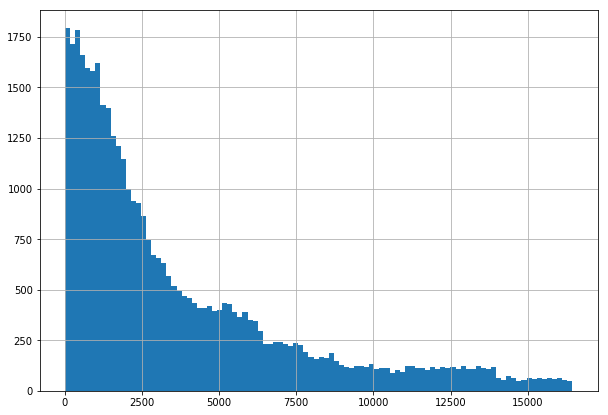

In [32]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

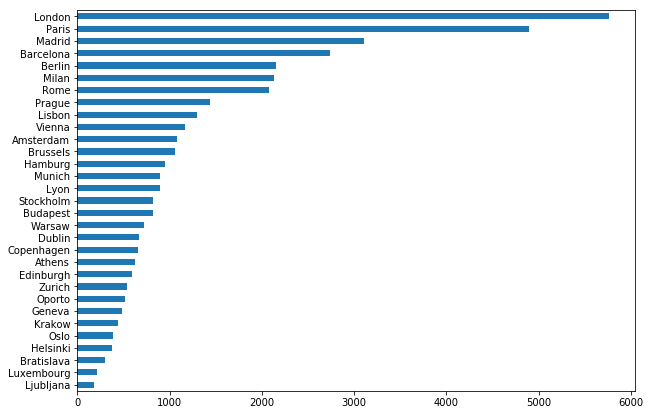

In [33]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

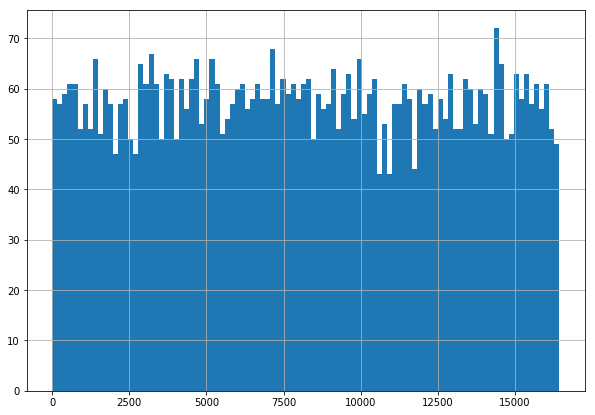

In [34]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

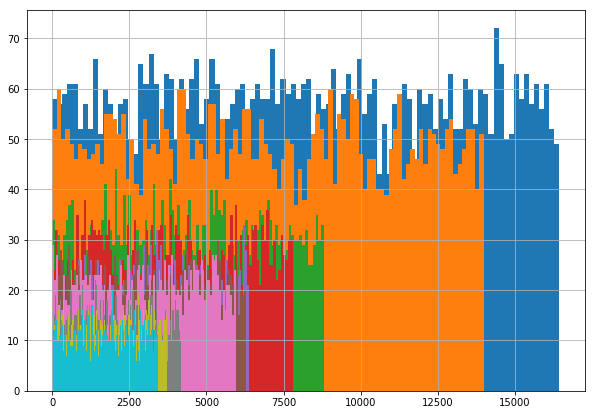

In [35]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

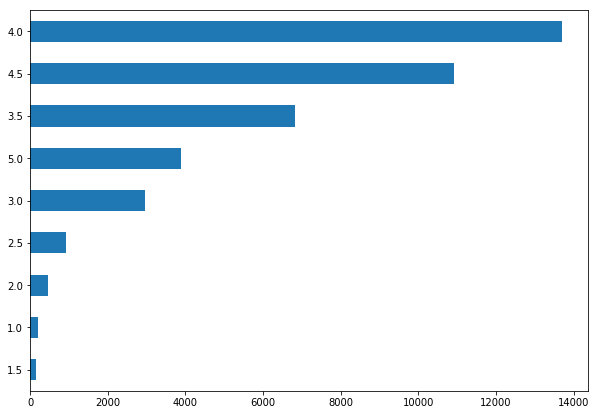

In [36]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

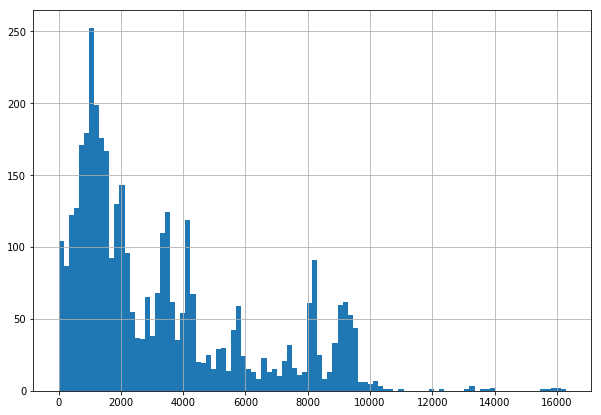

In [37]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

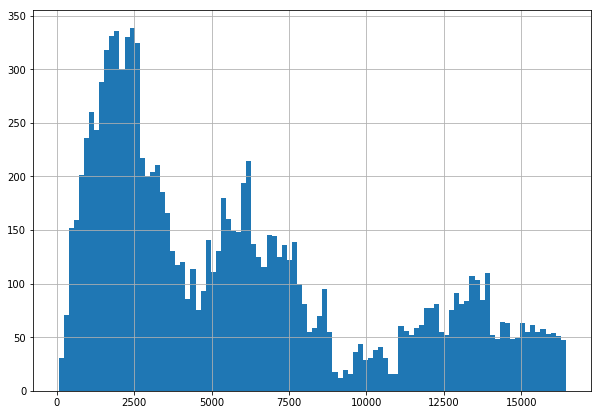

In [38]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

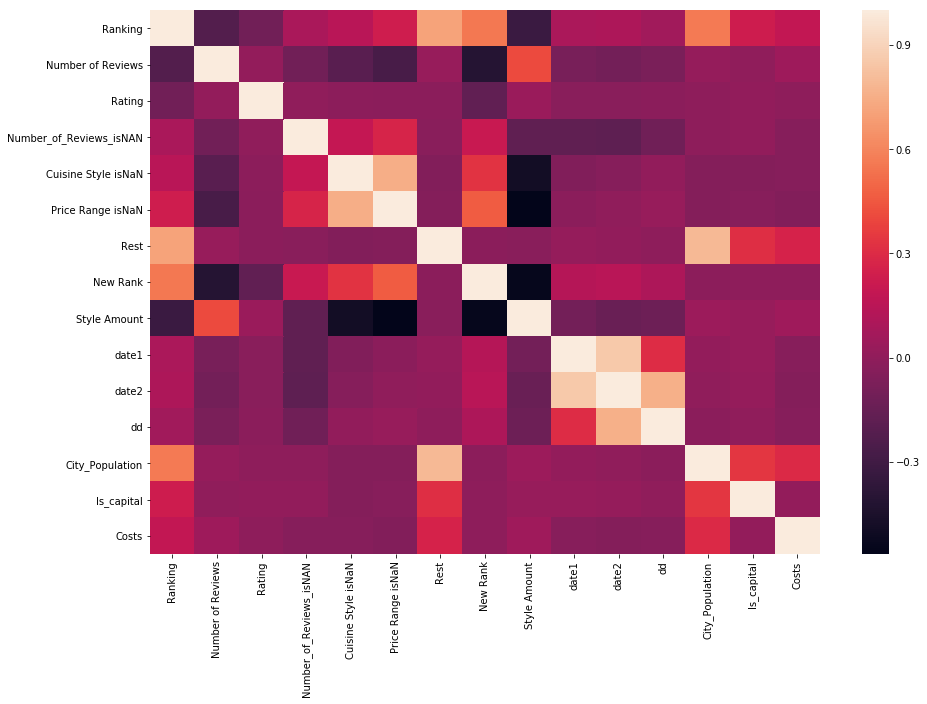

In [39]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [40]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')

df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [41]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    df_output['City1'] = df_output['City']
    
    
    # ################### 2. NAN ############################################################## 
    
    df_output['Number_of_Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    df_output['Number of Reviews'].fillna(0, inplace=True)
    
    df_output['Cuisine Style isNaN'] = pd.isna(df_output['Cuisine Style']).astype('uint8')
    df_output['Price Range isNaN'] = pd.isna(df_output['Price Range']).astype('uint8')
    
    # тут ваш код по обработке NAN 
    df_output['Price Range'] = df_output['Price Range'].fillna('$$ - $$$')
    
    
    # ################### 3. Encoding ############################################################## 
    # Price Range
    df_output['Price Range'] = df_output['Price Range'].replace('$', '1')
    df_output['Price Range'] = df_output['Price Range'].replace('$$ - $$$', '2')
    df_output['Price Range'] = df_output['Price Range'].replace('$$$$', '3')

    
    # ################### 4. Feature Engineering ####################################################
    
    # Amount of restaurants per city
    addata = df_output['City1'].value_counts().rename_axis('City1').to_frame(name='Rest')
    df_output = df_output.merge(addata, on='City1', how='left')
    df_output['New Rank'] = df_output['Ranking'] / df_output['Rest']

    # Amount of cuisine style per restaurant
    k = df_output['Cuisine Style'].str.split("', '").str.len().fillna(1)
    df_output['Style Amount'] = k
    
    # Добавляем 3 новых столбца: 
    # время между последним комментарием в датасете и последнем в ресторане: date1 
    # время между предпоследним комментарием в датасете и предпоследнем в ресторане: date2 
    # время между комментариями: dd
    
    pattern = re.compile('\d{2}/\d{2}/\d{4}')
    reviews=[]
    for i in df_output['Reviews']:
        reviews.append(re.findall(pattern, str(i)))
    rev = pd.DataFrame(reviews).dropna()
    rev.columns=['date1', 'date2']
    rev['date1'] = pd.to_datetime(rev['date1']) 
    rev['date2'] = pd.to_datetime(rev['date2']) 
    rev['dd']= rev['date1']-rev['date2']

    df_output['date1'] = rev['date1'].max() - rev['date1']
    df_output['date1'] = df_output['date1'].apply(lambda x: x.days)
    df_output['date1'] = df_output['date1'].fillna(0)
    df_output['date1'] = df_output['date1'].apply(lambda x: int(x))

    df_output['date2'] = rev['date1'].max() - rev['date2']
    df_output['date2'] = df_output['date2'].apply(lambda x: x.days)
    df_output['date2'] = df_output['date2'].fillna(0)
    df_output['date2'] = df_output['date2'].apply(lambda x: int(x))
    
    # Добавим еще признак: City_Population
    
    City_Population = {
    'London': 9304016, 'Paris': 2140526, 'Madrid': 3348536,'Barcelona': 1620343, 'Berlin': 3748148,
    'Milan': 1404239, 'Rome': 2856133, 'Prague': 1324277, 'Lisbon': 506654, 'Vienna': 1911728,
    'Amsterdam': 873555, 'Brussels': 1209000, 'Hamburg': 1841179, 'Munich': 1471508, 'Lyon': 515695,
    'Stockholm': 974073, 'Budapest': 1752286, 'Warsaw': 1790658, 'Dublin': 554554, 'Copenhagen': 626508,
    'Athens': 664046, 'Edinburgh': 524930, 'Zurich': 415367, 'Oporto': 237559, 'Geneva': 201818,
    'Krakow': 779115, 'Oslo': 693491, 'Helsinki': 648042, 'Bratislava': 432864, 'Luxembourg': 613894,
    'Ljubljana': 292988
    }
    
    df_output['City_Population'] = df_output['City1'].map(City_Population)
    
    # Добавим признак Is_capital: столица ли город, в котором находится ресторан. 
    # Для этого сделаем еще словарь
    
    Country = {
    'Amsterdam': 'Netherlands', 'Athens': 'Greece', 'Barcelona': 'Spain', 'Berlin': 'Germany',
    'Bratislava': 'Slovakia', 'Brussels': 'Belgium', 'Budapest': 'Hungary', 'Copenhagen': 'Denmark',
    'Dublin': 'Ireland', 'Edinburgh': 'United Kingdom', 'Geneva': 'Switzerland', 'Hamburg': 'Germany',
    'Helsinki': 'Finland', 'Krakow': 'Poland', 'Lisbon': 'Portugal', 'Ljubljana': 'Slovenia',
    'London': 'United Kingdom', 'Luxembourg': 'Luxembourg', 'Lyon': 'France', 'Madrid': 'Spain',
    'Milan': 'Italy', 'Munich': 'Germany', 'Oporto': 'Portugal', 'Oslo': 'Norway', 'Paris': 'France',
    'Prague': 'Czechia', 'Rome': 'Italy', 'Stockholm': 'Sweden', 'Vienna': 'Austria','Warsaw': 'Poland',
    'Zurich': 'Switzerland'
    }

    df_output['Country'] = df_output['City1'].map(Country)

    Capital = ['Paris', 'Stockholm', 'London', 'Berlin', 'Bratislava', 'Vienna', 'Rome', 'Madrid',
       'Dublin', 'Brussels', 'Warsaw', 'Budapest', 'Copenhagen','Amsterdam', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Ljubljana', 'Athens', 'Luxembourg']

    df_output['Is_capital'] = df_output['City1'].apply(lambda row: row in Capital).astype('uint8')
    
    # Добавим признак - сколько тратит житель страны на рестораны: Costs

    Costs = {
    'Belgium': 1280.0, 'Bulgaria': 350.0, 'Czechia': 840.0, 'Denmark': 1500.0,  'Germany': 1100.0,
    'Estonia': 830.0, 'Ireland': 3350.0, 'Greece': 1425.0, 'Spain': 2270.0, 'France': 1370.0,
    'Italy': 1820.0, 'Cyprus': 2940.0, 'Latvia': 600.0, 'Lithuania': 410.0, 'Luxembourg': 2350.0,
    'Hungary': 630.0, 'Malta': 2820.0, 'Netherlands': 1690.0, 'Austria': 3080.0, 'Poland': 270.0,
    'Portugal': 1800.0, 'Romania': 210.0, 'Slovenia': 930.0, 'Slovakia': 550.0, 'Finland': 1430.0,
    'Sweden': 1420.0, 'United Kingdom': 2120.0, 'Iceland': 4710.0, 'Norway': 1940.0,
    'Switzerland': 1425.0
     }

    df_output['Costs'] = df_output['Country'].map(Costs)
    
    df_output = pd.get_dummies(df_output, columns=[ 'City'], dummy_na=True)
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберем их и удалим
    
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [42]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Cuisine Style isNaN,Price Range isNaN,Rest,New Rank,Style Amount,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
25971,2816.0,11.0,1,4.0,0,0,1,1647,1.709775,1.0,...,0,0,0,0,0,0,0,0,0,0
24082,221.0,236.0,1,4.5,0,0,0,836,0.264354,4.0,...,0,0,0,0,0,0,0,0,0,0
31353,2009.0,13.0,1,3.5,0,0,0,925,2.171892,2.0,...,0,0,0,0,0,0,0,1,0,0
21107,1994.0,0.0,1,5.0,1,0,0,1816,1.098018,3.0,...,0,0,0,1,0,0,0,0,0,0
13906,1885.0,158.0,1,4.0,0,0,0,3813,0.494361,2.0,...,0,0,0,0,0,0,0,0,0,0
17324,610.0,214.0,1,4.5,0,0,0,1647,0.370370,7.0,...,0,0,0,0,0,0,0,0,0,0
28616,7108.0,7.0,1,3.5,0,0,1,3395,2.093667,2.0,...,0,0,0,0,0,0,0,0,0,0
14824,5146.0,24.0,1,4.0,0,1,1,6108,0.842502,1.0,...,0,0,1,0,0,0,0,0,0,0
41329,3570.0,236.0,1,3.5,0,0,0,3395,1.051546,2.0,...,0,0,0,0,0,0,0,0,0,0
34786,2206.0,37.0,1,3.0,0,0,0,1126,1.959147,1.0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 47 columns):
Ranking                    50000 non-null float64
Number of Reviews          50000 non-null float64
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
Cuisine Style isNaN        50000 non-null uint8
Price Range isNaN          50000 non-null uint8
Rest                       50000 non-null int64
New Rank                   50000 non-null float64
Style Amount               50000 non-null float64
date1                      50000 non-null int64
date2                      50000 non-null int64
City_Population            50000 non-null int64
Is_capital                 50000 non-null uint8
Costs                      50000 non-null float64
City_Amsterdam             50000 non-null uint8
City_Athens                50000 non-null uint8
City_Barcelona             50000 non-null uint8
City_Berlin    

In [44]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [45]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [46]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 46), (40000, 46), (40000, 45), (32000, 45), (8000, 45))

# Model 
Сам ML

In [47]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [48]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [49]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [50]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20250125


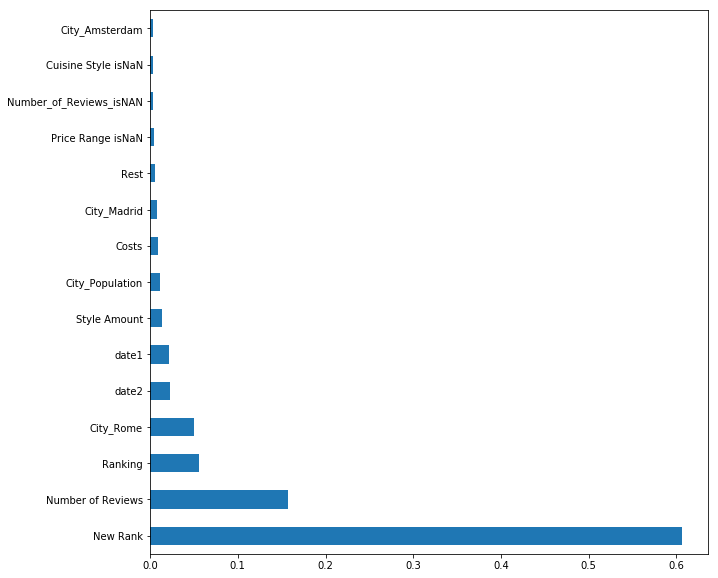

In [51]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [52]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Number_of_Reviews_isNAN,Cuisine Style isNaN,Price Range isNaN,Rest,New Rank,Style Amount,date1,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
8186,4597.0,104.0,0.0,0,0,0,6108,0.752620,3.0,163,...,0,0,1,0,0,0,0,0,0,0
3559,1732.0,6.0,0.0,0,0,1,1126,1.538188,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3065,3909.0,8.0,0.0,0,0,0,3395,1.151399,1.0,0,...,0,0,0,0,0,0,0,0,0,0
5528,1588.0,3.0,0.0,0,1,1,1443,1.100485,1.0,0,...,0,0,0,0,0,0,1,0,0,0
2947,3397.0,2.0,0.0,0,0,1,2705,1.255823,1.0,1655,...,0,0,0,0,0,0,0,0,0,0
3022,629.0,25.0,0.0,0,0,0,642,0.979751,3.0,112,...,1,0,0,0,0,0,0,0,0,0
6283,6383.0,59.0,0.0,0,0,0,7193,0.887391,2.0,192,...,0,0,0,0,0,0,0,0,0,0
6997,1804.0,34.0,0.0,0,0,0,836,2.157895,3.0,331,...,0,0,0,0,0,0,0,0,0,0
9053,828.0,106.0,0.0,0,0,0,1372,0.603499,5.0,183,...,0,0,0,0,0,0,0,0,0,0
6161,4460.0,6.0,0.0,0,0,1,3813,1.169683,2.0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
test_data = test_data.drop(['Rating'], axis=1)

In [54]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [55]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [56]:
predict_submission

array([3.05 , 4.17 , 4.46 , ..., 3.045, 4.5  , 4.18 ])

In [57]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.050
1,id_1,4.170
2,id_2,4.460
3,id_3,4.265
4,id_4,4.450
5,id_5,4.350
6,id_6,3.005
7,id_7,2.315
8,id_8,4.095
9,id_9,4.675
